# Regresión de vectores de apoyo (SVR)

## Importar las librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importar el conjunto de datos


In [2]:
datos = pd.read_csv('Position_Salaries.csv')
datos.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
X = datos.iloc[:, 1:-1].values
y = datos.iloc[:, -1].values

In [4]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Debido a que los escaladores disponibles en sklearn exigen que los datos estén en un formato de matriz bi-dimensional, tendremos que cambiar la forma de "y" ya que, como se puede ver arriba, esta en formato de vector

In [6]:
y = y.reshape(len(y),1)

In [7]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Escalamiento o Normalización

Ya que con SVR se debe escalar o normalizar porque si bien puede existir una ecuación con un coeficiente que asuma ese aumento de los valores no se sabe cual es. es decir si esa relación entre X & Y y no existir un valor para ello mejor normalizar todo

Acá sí vamos a normalizar los datos ya que no tenemos los coeficientes que puedan absorber las diferencias en los rangos.

También lo aplicamos a la variable dependiente ya que tiene mucha variación

**Notar** que se utiliza un escalador diferente para X y otro para y ¿por qué?

In [8]:
from sklearn.preprocessing import StandardScaler
normalizador_X = StandardScaler()
normalizador_y = StandardScaler()
X_norm = normalizador_X.fit_transform(X)
y_norm = normalizador_y.fit_transform(y).reshape(-1, )

In [9]:
print(X_norm)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [10]:
print(y_norm)

[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


## Entrenamiento del modelo SVR model con todos los datos

Al no poner un parametro en la instanciación de la clase SVR, por defuault usa el kernel RBF (radial bases functions) pero hay otros mas

In [11]:
from sklearn.svm import SVR
regresor = SVR()
regresor.fit(X_norm, y_norm)

SVR()

## Predicción de un resultado nuevo

Recordar siempre que un -1 en una instrucción .reshape() es simplemente un comodín que quere decir ajuste esta dimensión para que cuadre con los datos.

In [12]:
normalizador_y.inverse_transform(regresor.predict(normalizador_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

dado que se usa datos normalizados se puede usar una función de regresor para obtener ese dato desnormalizado.

para ello se normaliza el valor de prediccion y se predice con el regresor y luego se aplica una desnormalización para ese valor obtenido.

## Predicción para todas las observaciones

In [13]:
y_pred = normalizador_y.inverse_transform(regresor.predict(X_norm).reshape(-1, 1))

## Visualización de los resultados de SVR

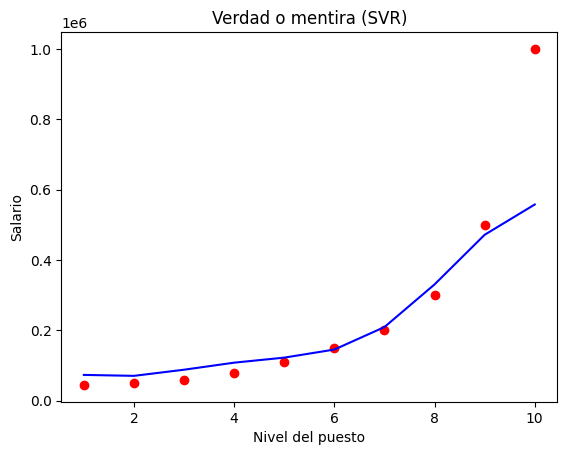

In [14]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred.reshape(-1,1), color = 'blue')
plt.title('Verdad o mentira (SVR)')
plt.xlabel('Nivel del puesto')
plt.ylabel('Salario')
plt.show()

## Visualización de los resultados (para una curva de mayor resolución)

C:\Users\josue\AppData\Local\Temp\ipykernel_51440\3351521248.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_malla = np.arange(min(X), max(X), 0.1)


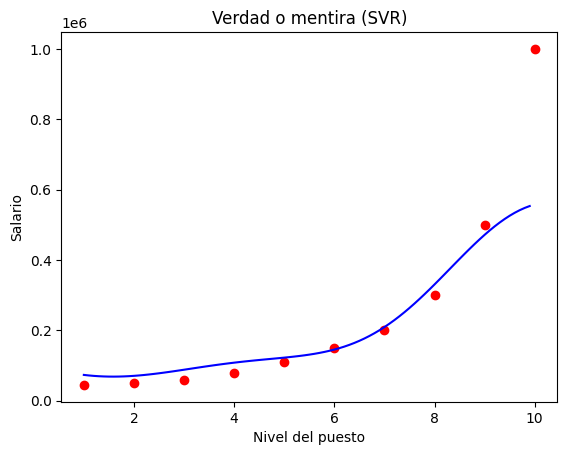

In [15]:
X_malla = np.arange(min(X), max(X), 0.1)
X_malla = X_malla.reshape((len(X_malla), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_malla, normalizador_y.inverse_transform(regresor.predict(normalizador_X.transform(X_malla)).reshape(-1,1)), color = 'blue')
plt.title('Verdad o mentira (SVR)')
plt.xlabel('Nivel del puesto')
plt.ylabel('Salario')
plt.show()